# Exploartory Analysis: Bike sharing data

In [2]:
# loading all required packages
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(data.table))
library(tidyverse)
library(forecast)
library(tseries)
library(data.table)
library(corrplot)
library(WVPlots)

Warning message:
“package ‘tibble’ was built under R version 3.5.2”
Warning message:
“package ‘tidyr’ was built under R version 3.5.2”
Warning message:
“package ‘dplyr’ was built under R version 3.5.2”
Warning message:
“package ‘data.table’ was built under R version 3.5.2”
corrplot 0.84 loaded



In [3]:
# read the data
df1 <- fread("//Users//raviswanath//Downloads//Case\ Studies//Bike-Sharing-Dataset//day.csv")

In [5]:
# Statistical summary of the data set
summary(df1)

    instant         dteday              season            yr        
 Min.   :  1.0   Length:731         Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   Mode  :character   Median :3.000   Median :1.0000  
 Mean   :366.0                      Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0                      Max.   :4.000   Max.   :1.0000  
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.000  
   weathersit         temp             atemp    

In [9]:
str(df1)

Classes ‘data.table’ and 'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "2011-01-01" "2011-01-02" "2011-01-03" "2011-01-04" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [10]:
# converting a few variables into factors
df1$season <- as.factor(df1$season)
df1$holiday <- as.factor(df1$holiday)
df1$weekday <- as.factor(df1$weekday)
df1$workingday <- as.factor(df1$workingday)
df1$weathersit <- as.factor(df1$weathersit)

In [27]:
# create a date column agnostic of time
df1$date <- as.Date(df1$dteday, format='%Y-%m-%d')

## Distributions

We have temperature, humidity, windspeed and count of bike rentals as continuous variables whose distributions need to be understood. 

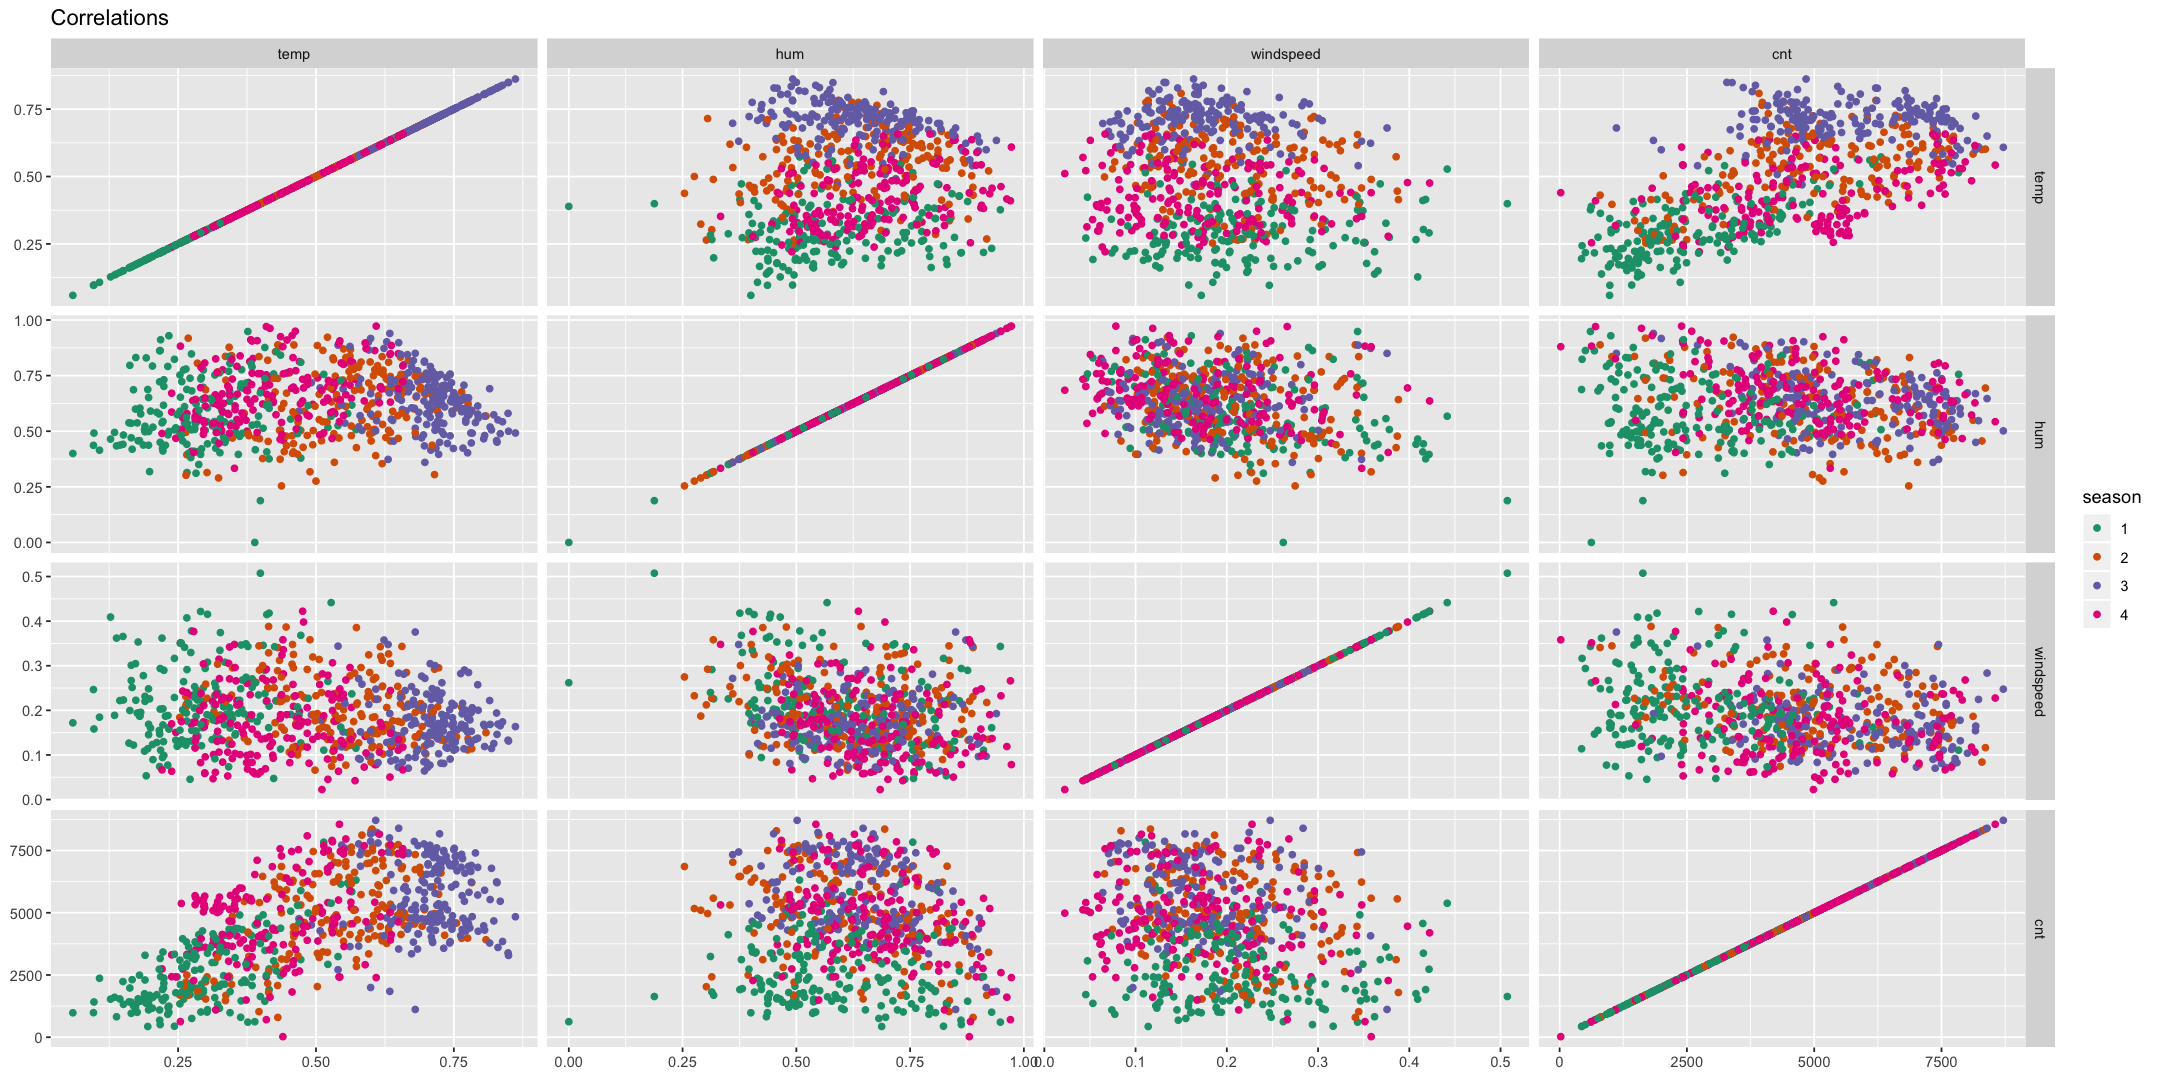

In [64]:
# Pairplots to show relationships
df1 %>% 
    PairPlot( c("temp", "hum", "windspeed", "cnt"), title="Correlations", group_var = "season") 

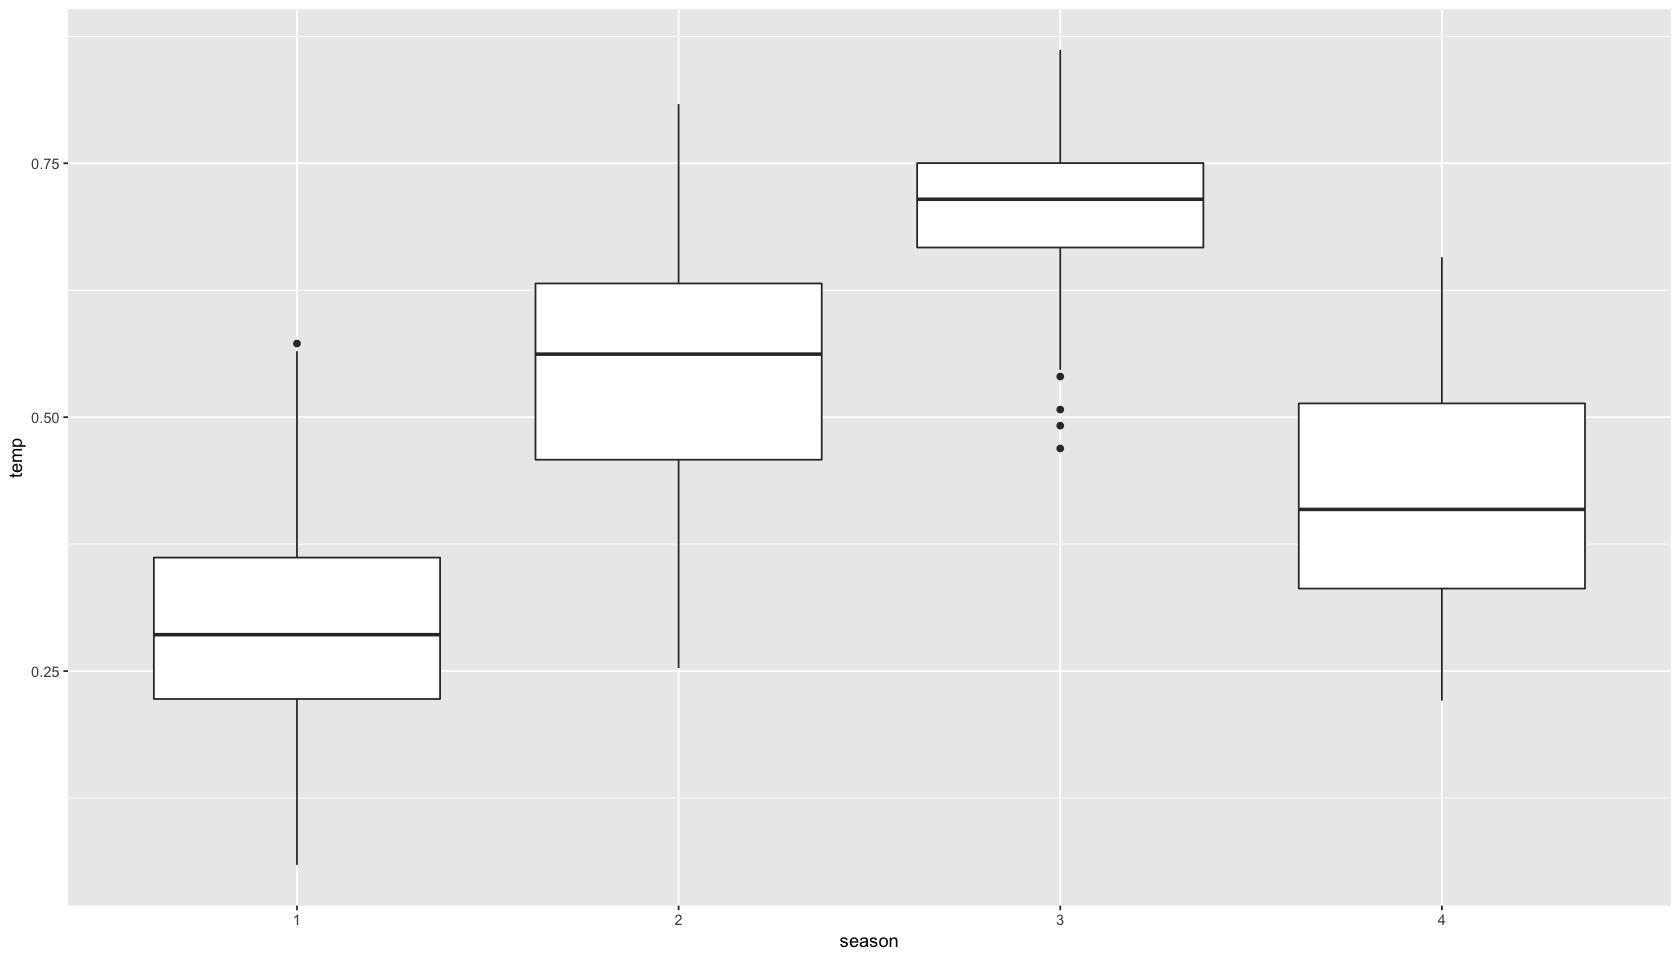

In [12]:
# Temperature by seasons
options(repr.plot.width=14, repr.plot.height=8)
ggplot(df1, aes(season, temp)) + geom_boxplot()

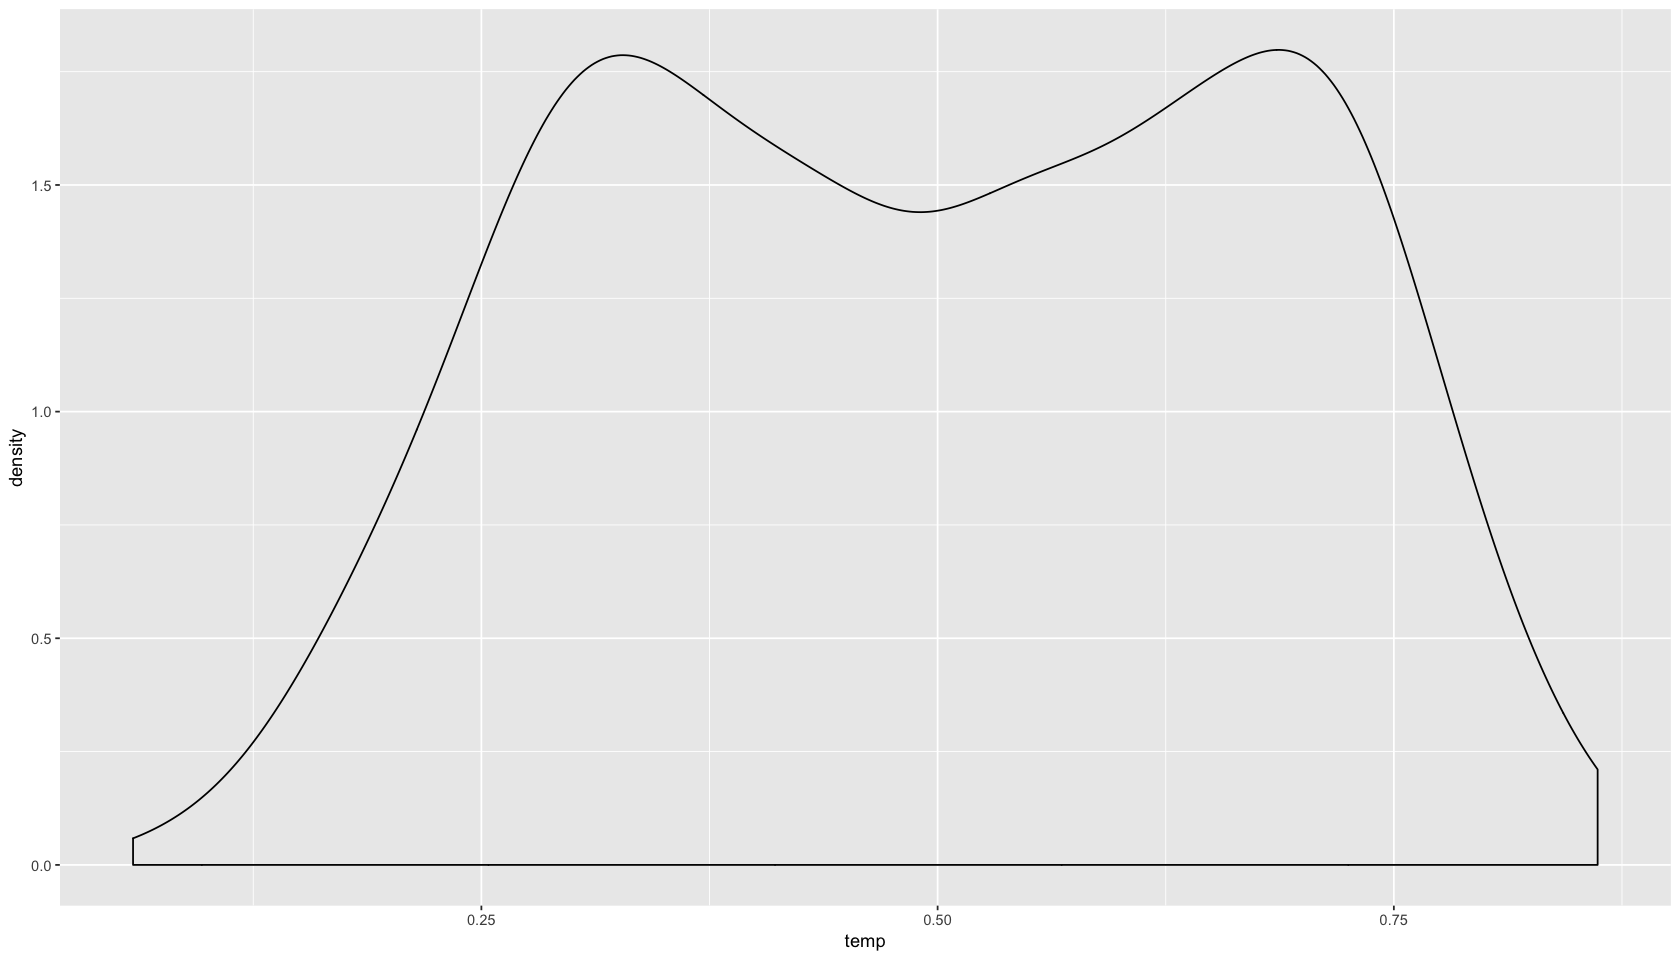

In [15]:
# Air Temperature
df1 %>% ggplot() + geom_density(aes(temp), color='black')

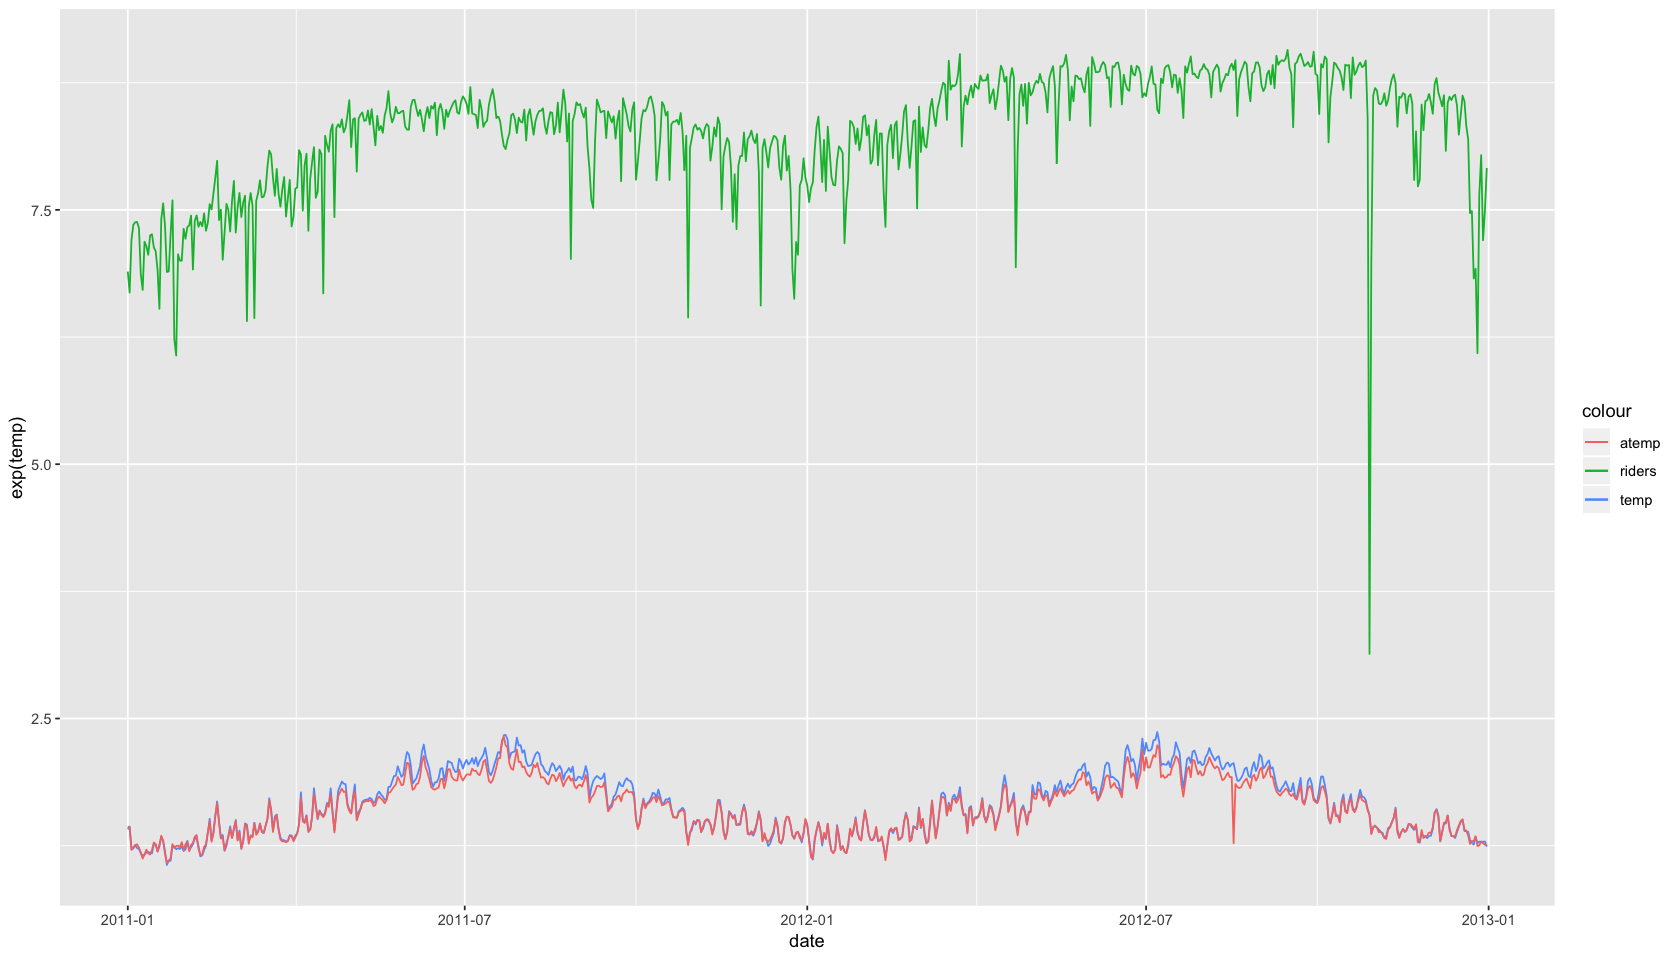

In [11]:
# plot to understand ridership variance with temperature
df1 %>% 
    ggplot() + geom_line(aes(date, exp(temp), color="temp")) + 
    geom_line(aes(date, exp(atemp), color='atemp')) + geom_line(aes(date, log(cnt+1), color='riders'))

## Do holidays correlate with higher ridership? 

In [33]:
df1 %>% 
    mutate(year= year(date))%>%
    group_by(year, holiday) %>% 
    summarize(n(), avg_ridership = mean(cnt), median_ridership = median(cnt))

year,holiday,n(),avg_ridership,median_ridership
<int>,<fct>,<int>,<dbl>,<dbl>
2011,0,355,3417.130,3747.0
2011,1,10,3002.200,3238.5
2012,0,355,5637.079,5936.0
2012,1,11,4401.182,5478.0


## Ridership by month and year

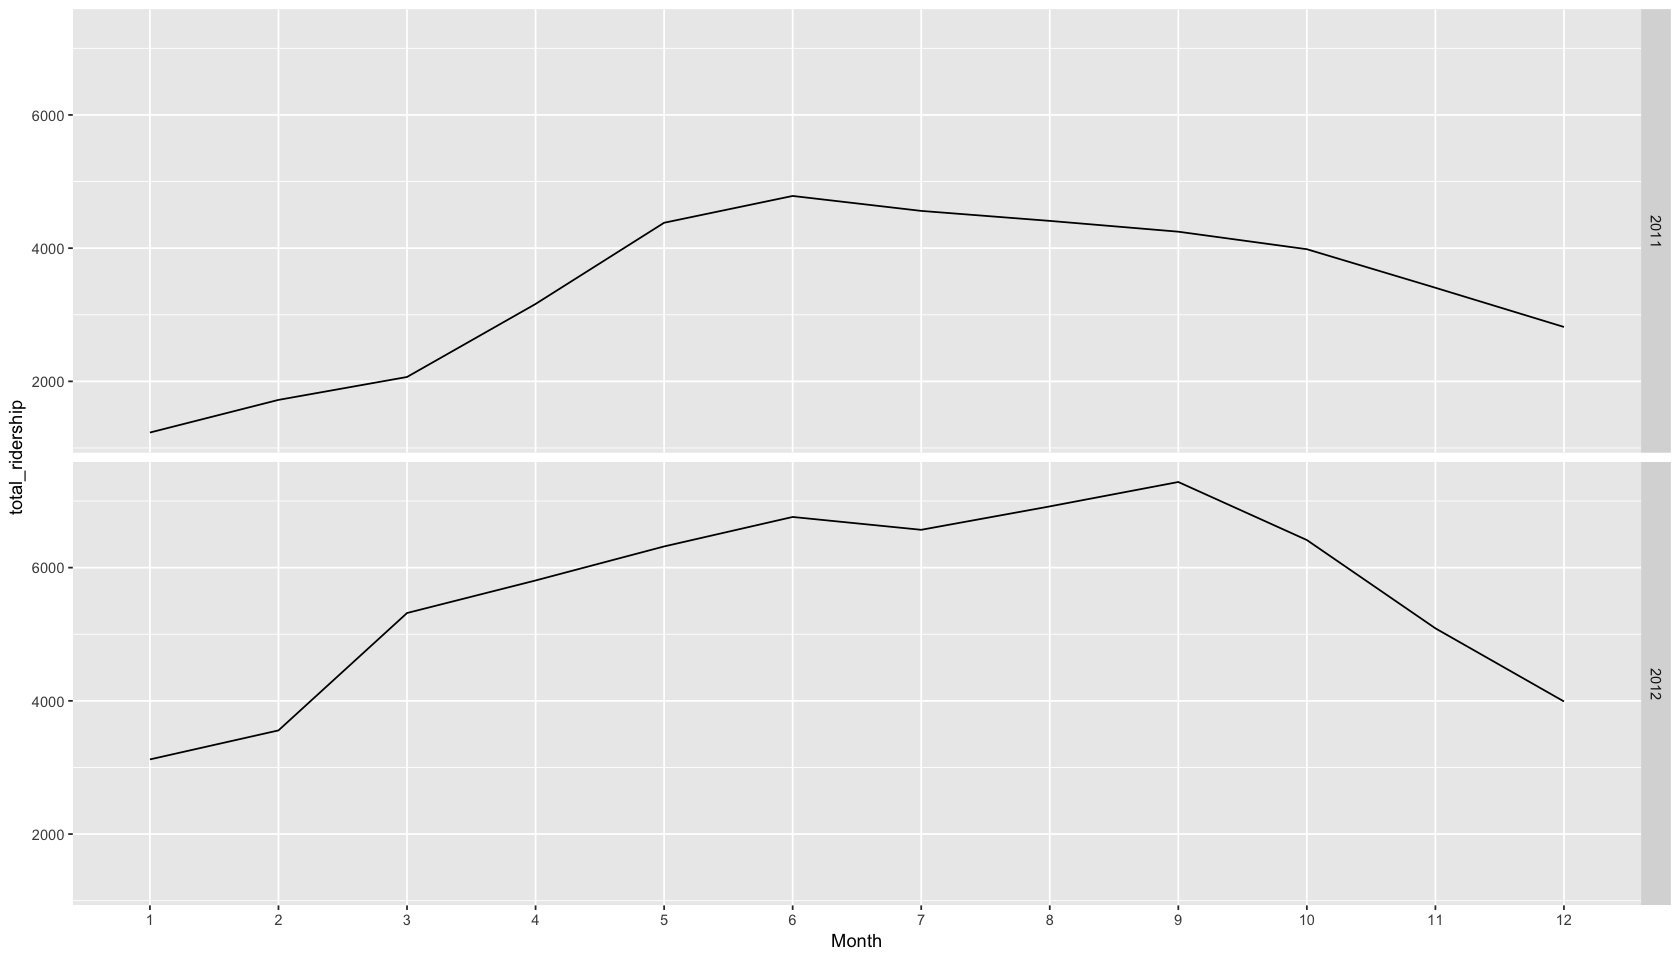

In [46]:
df1 %>% 
    mutate(month_of_year = month(date), year=year(date)) %>%
    group_by(year, month_of_year) %>%
    summarize(total_ridership = mean(cnt)) %>%
    ggplot(aes(as.factor(month_of_year), total_ridership)) + 
    geom_line(group=1) + facet_grid(rows=vars(year)) + xlab("Month")

## Ridership by day of week

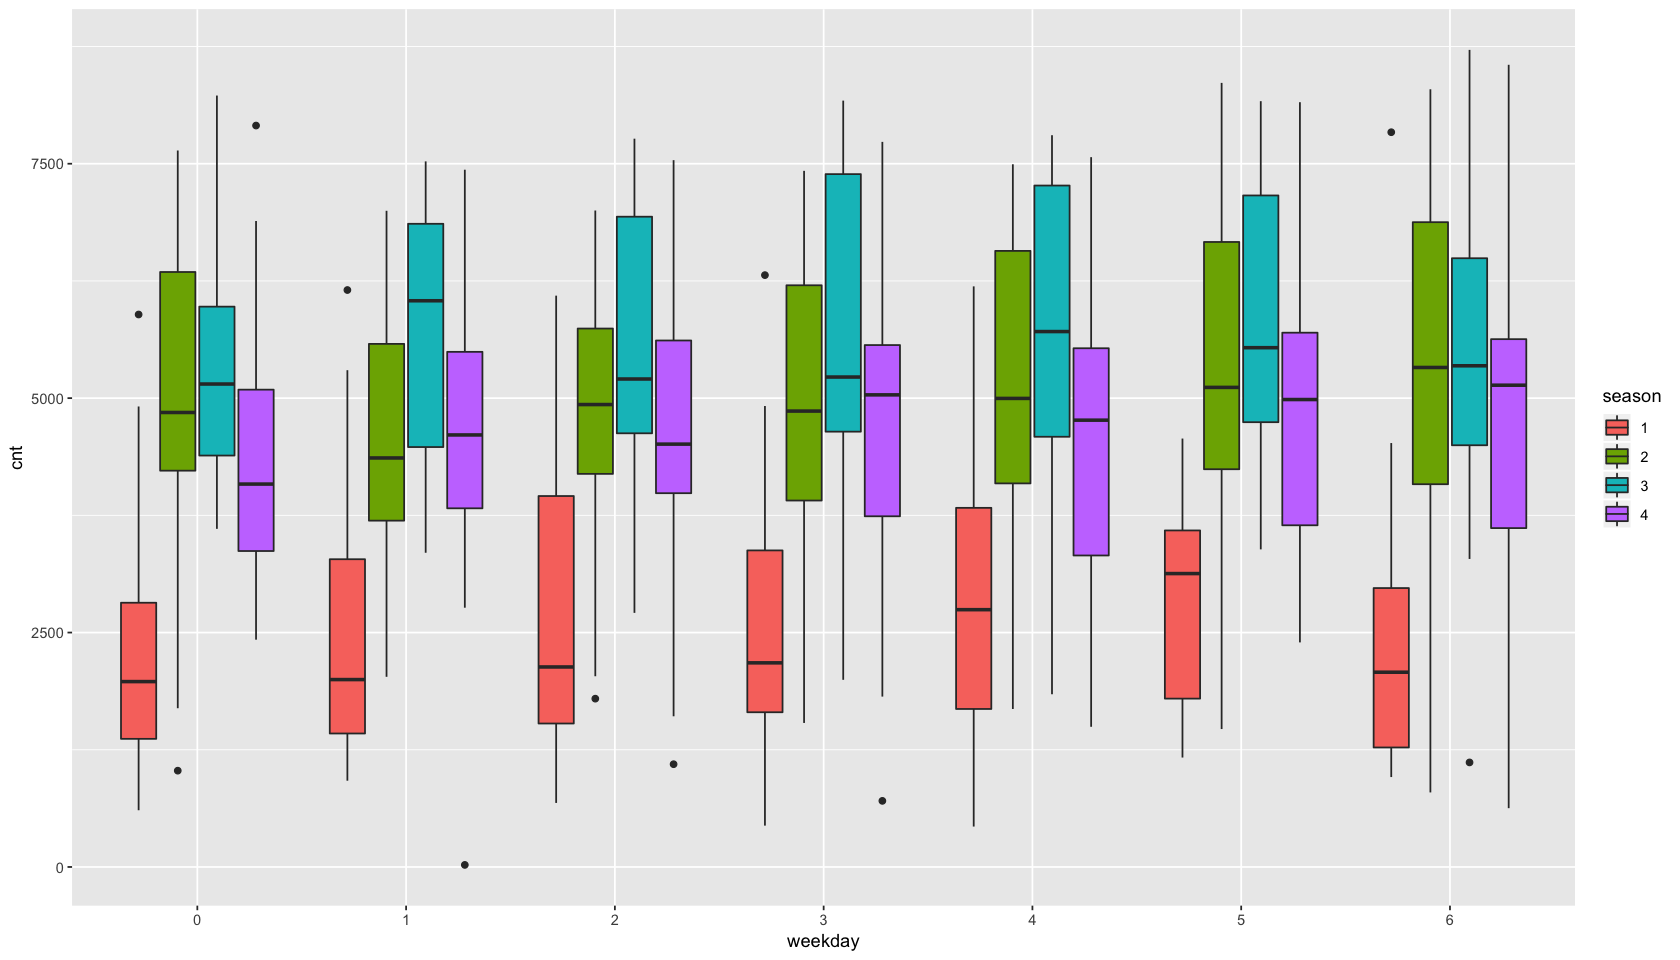

In [43]:
df1 %>% 
    ggplot(aes(weekday, cnt)) + geom_boxplot(aes(fill=season))

## Correlation matrix

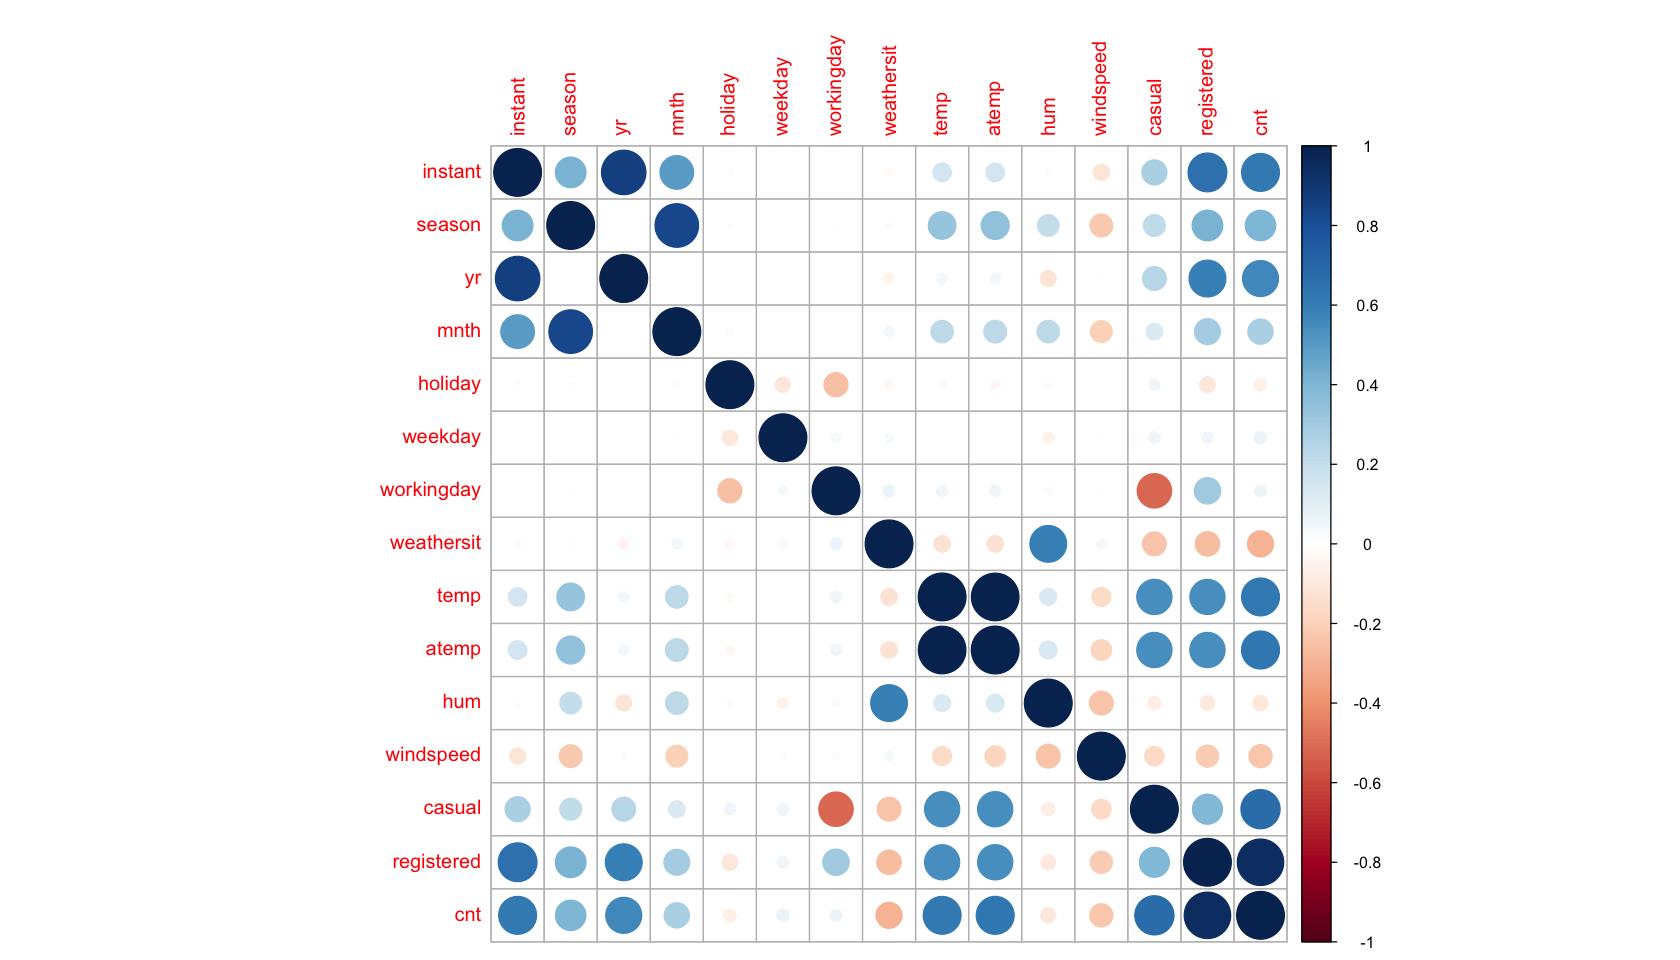

In [13]:
M <- cor(select_if(df1, is.numeric))
corrplot(M, method="circle")

Highly correlated variables to the count values include the weather, temperature, humidity and season. We would use all these variables as additional regressors into ARIMA and then evaluate the performance of the model on a validation data set. 

## Investigationg for non-linear relationship between weather and ridership

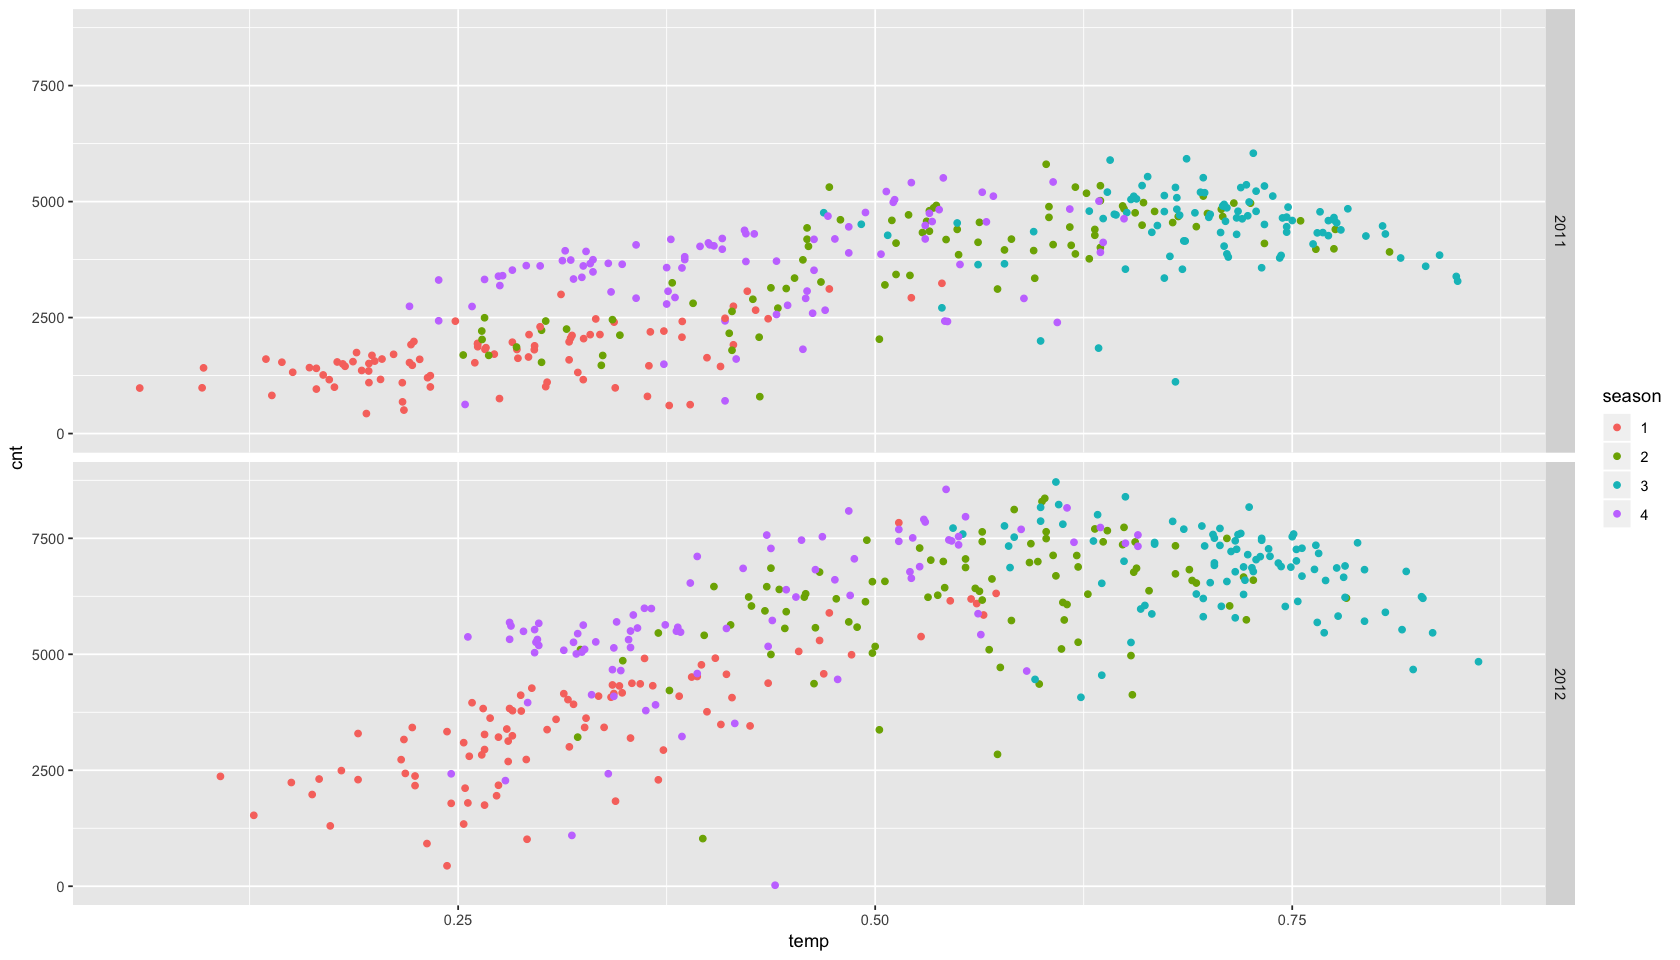

In [49]:
df1 %>% 
    mutate(year=year(date)) %>%
    ggplot(aes(temp, cnt)) + geom_point(aes(color=season)) + facet_grid(rows=vars(year))

The non-linear relationship of the two variables is more evident in the year 2012. The ridership non-linearly increases as the temperature increases and falls off beyond a certain temperature threshold, indicating too hot a weather to ride on a bike. 

## Ridership by day

Warning message:
“Removed 6 rows containing missing values (geom_path).”
Warning message:
“Removed 30 rows containing missing values (geom_path).”


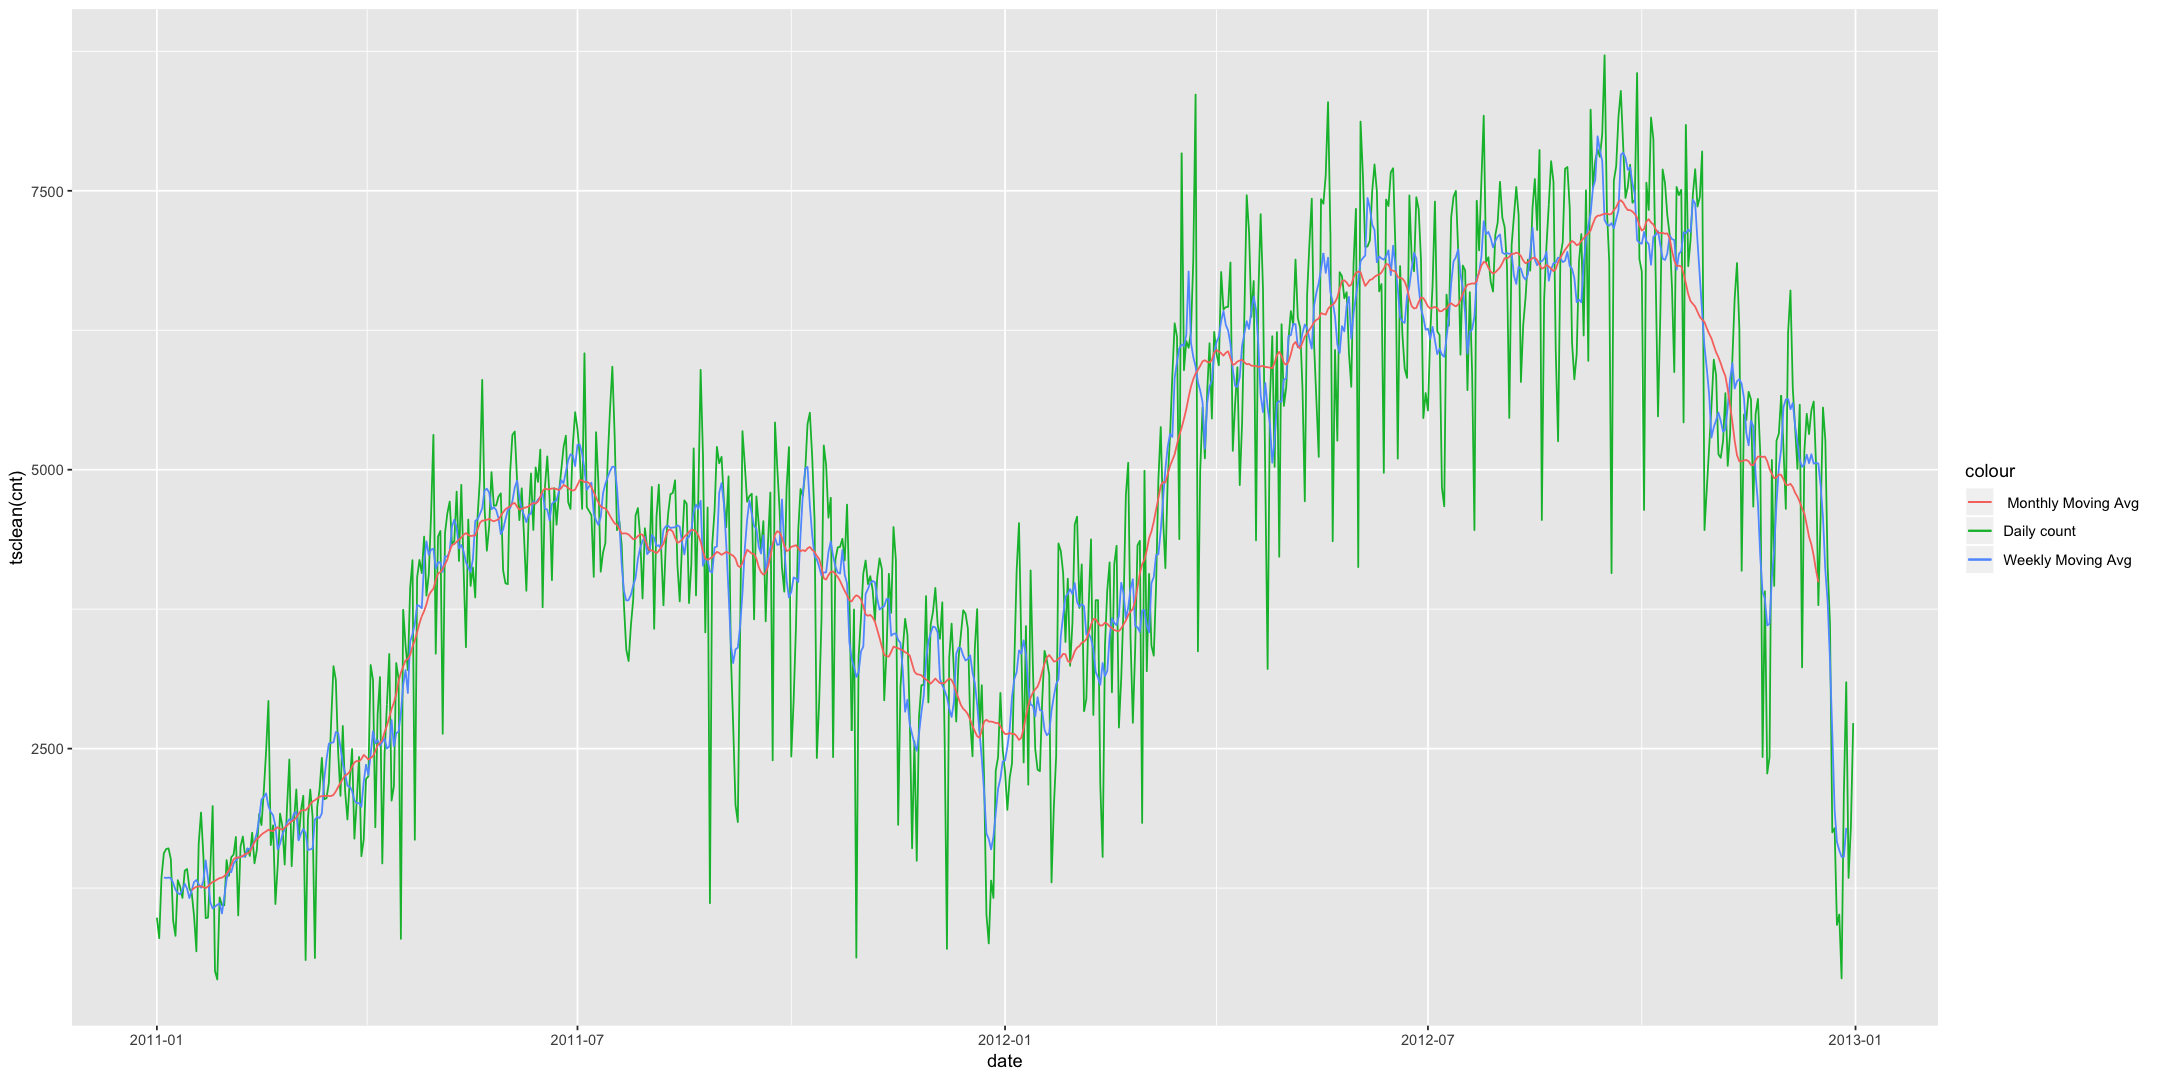

In [54]:
options(repr.plot.width=18, repr.plot.height=9)
df1 %>% 
    mutate(ma_weekly = ma(tsclean(cnt), order=7),
           ma_monthly = ma(tsclean(cnt), order=30)) %>%
    ggplot() + geom_line(aes(date, tsclean(cnt), colour="Daily count")) +
    geom_line(aes(x=date, y=ma_weekly, colour="Weekly Moving Avg")) +
    geom_line(aes(x=date, y=ma_monthly, color=" Monthly Moving Avg"))